# Samsung Electronics Stock Price Analysis
This notebook provides a comprehensive analysis of Samsung Electronics' stock price data from 2000 onwards.

## Importing nessecary Libraries and dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/Samsung Dataset.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.709961,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859863,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.098145,46880000


## Data Exploration
Let's explore the dataset to understand its structure and content.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6127 entries, 2000-01-04 to 2024-06-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6127 non-null   float64
 1   High       6127 non-null   float64
 2   Low        6127 non-null   float64
 3   Close      6127 non-null   float64
 4   Adj Close  6127 non-null   float64
 5   Volume     6127 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 335.1 KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6.127000e+03
mean,28370.058756,28644.142321,28084.267994,28360.006528,24504.066849,2.117578e+07
std,22589.409269,22764.800972,22394.681276,22567.361619,22041.302899,1.505888e+07
min,2540.000000,2760.000000,2420.000000,2730.000000,1988.168701,0.000000e+00
25%,10700.000000,10900.000000,10560.000000,10720.000000,7901.645264,1.169668e+07
50%,21020.000000,21420.000000,20740.000000,21060.000000,16245.702148,1.715000e+07
75%,45590.000000,46100.000000,45170.000000,45590.000000,39041.779297,2.620915e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,85300.000000,1.642150e+08


## Data Visualization
Visualize the key features of the dataset.

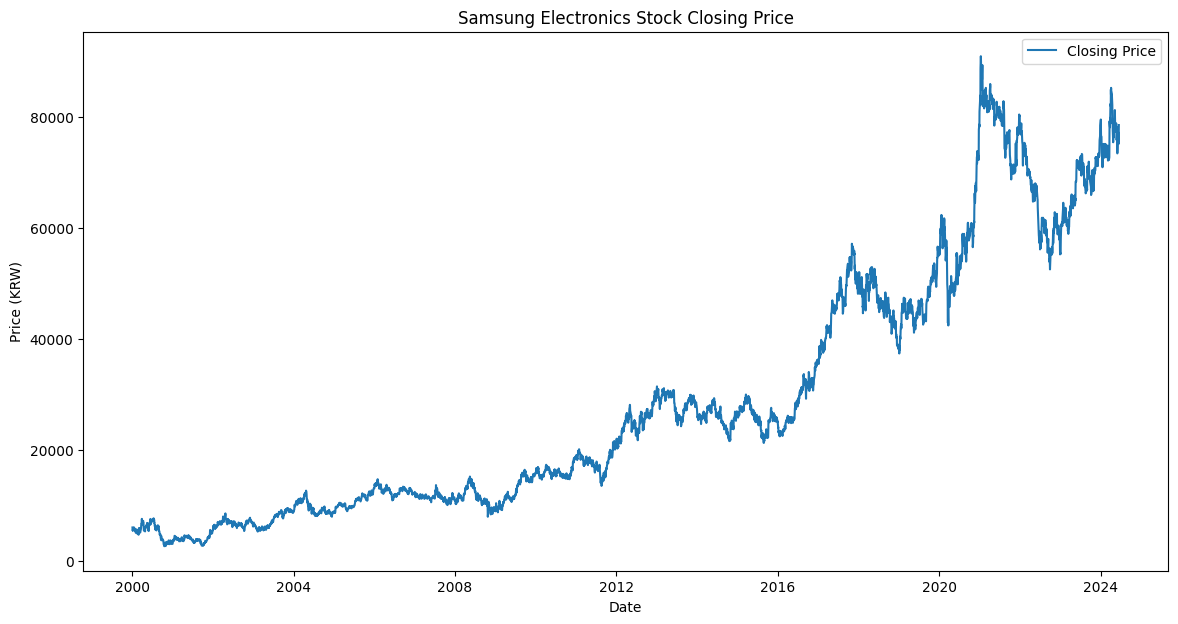

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('Samsung Electronics Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()
plt.show()

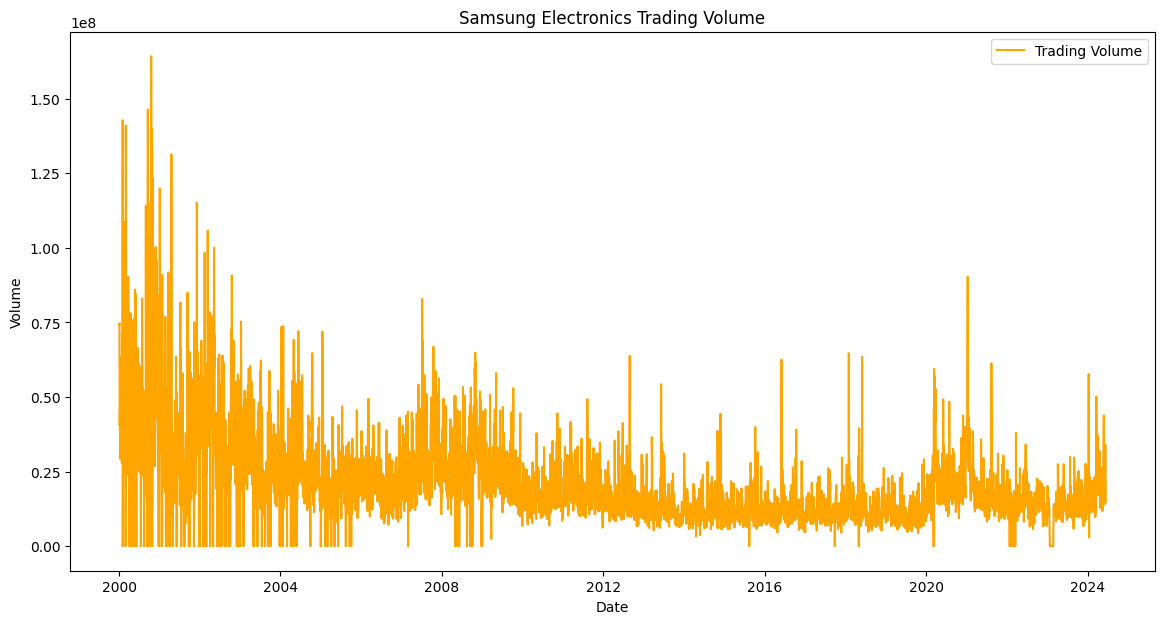

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(df['Volume'], label='Trading Volume', color='orange')
plt.title('Samsung Electronics Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

## Seasonal Decomposition
Decompose the time series to analyze the trend, seasonality, and residuals.

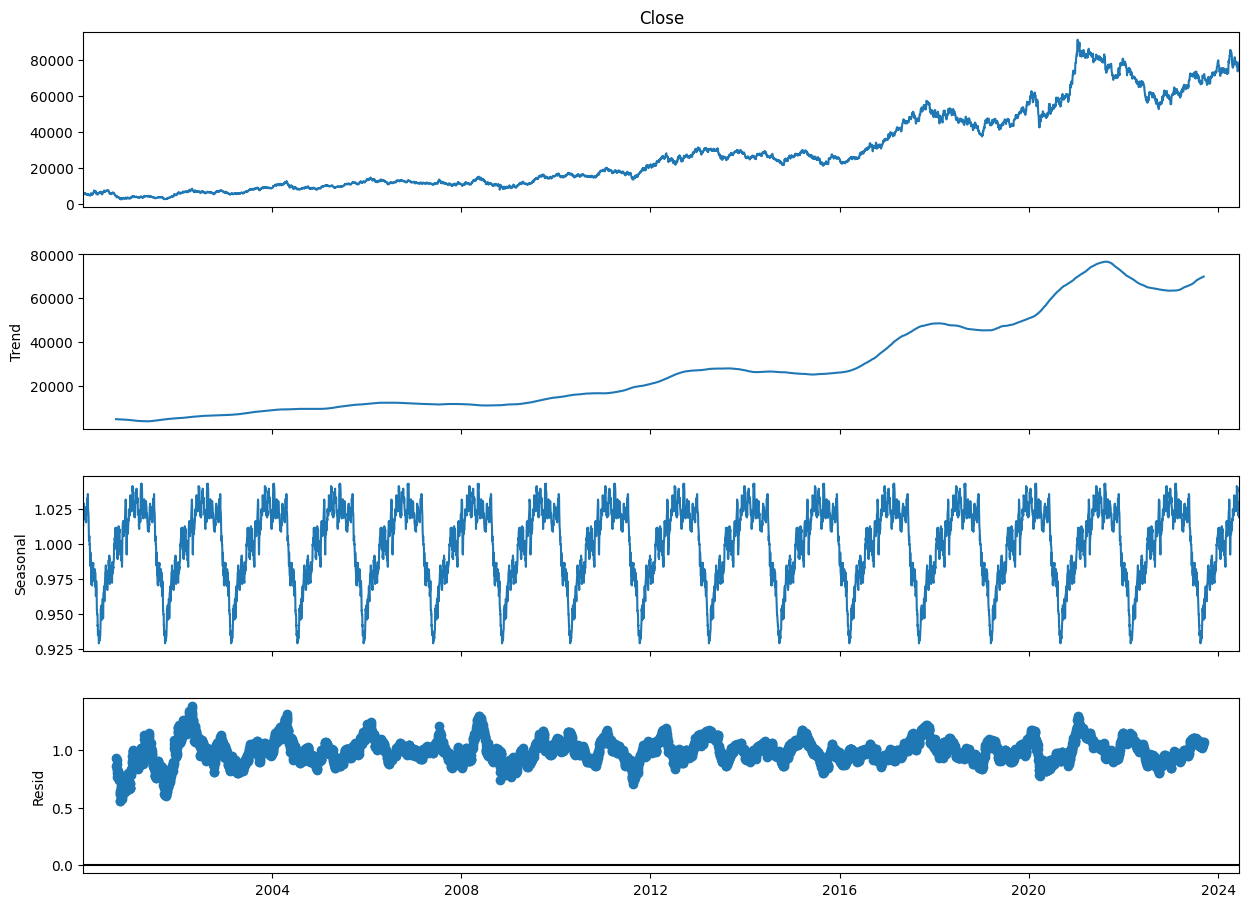

In [12]:
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

## Time Series Forecasting using Holt-Winters Method
Apply the Holt-Winters exponential smoothing method to forecast future stock prices.

In [13]:
train = df['Close'][:int(0.8*len(df))]
test = df['Close'][int(0.8*len(df)):]

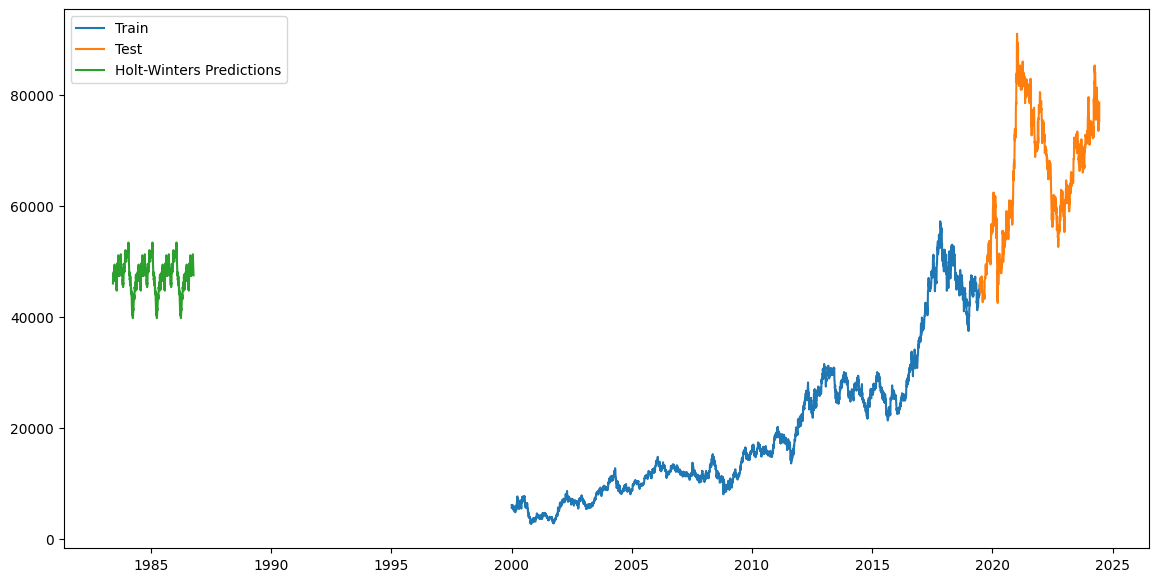

In [14]:
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=365)
fit = model.fit()
predictions = fit.forecast(len(test))
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Holt-Winters Predictions')
plt.legend()
plt.show()

### Evaluation of Holt-Winters Method

In [15]:
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 474468513.444922
Mean Absolute Error: 18832.44413605887


## Time Series Forecasting using Prophet
Apply Facebook's Prophet model for forecasting.

16:07:22 - cmdstanpy - INFO - Chain [1] start processing
16:07:30 - cmdstanpy - INFO - Chain [1] done processing


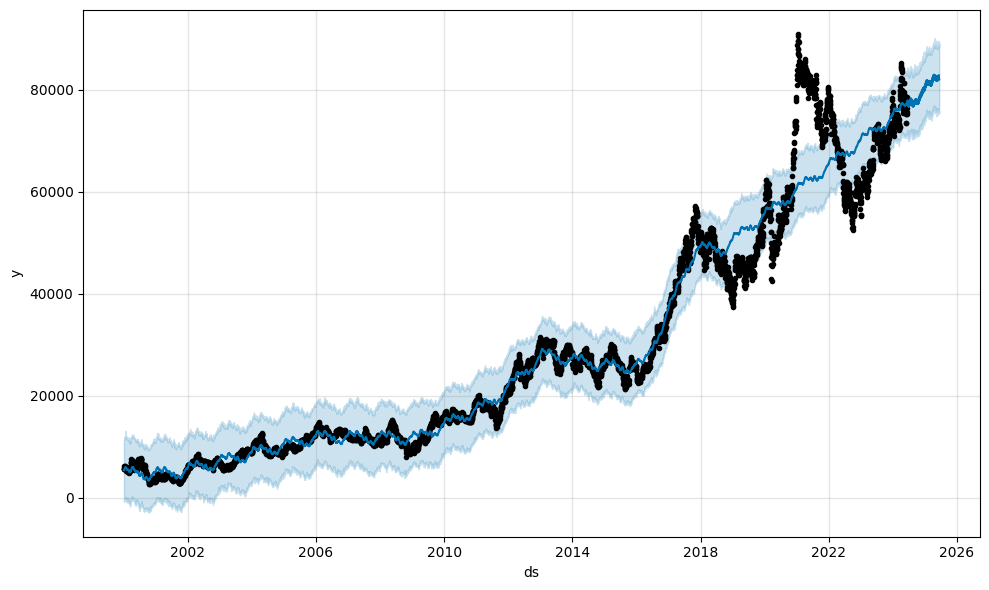

In [16]:
df_prophet = df['Close'].reset_index()
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

### Evaluation of Prophet Model

In [17]:
forecast_test = forecast.set_index('ds').loc[test.index]
mse_prophet = mean_squared_error(test, forecast_test['yhat'])
mae_prophet = mean_absolute_error(test, forecast_test['yhat'])
print(f'Mean Squared Error (Prophet): {mse_prophet}')
print(f'Mean Absolute Error (Prophet): {mae_prophet}')

Mean Squared Error (Prophet): 93996677.39931782
Mean Absolute Error (Prophet): 7518.757316994404


## Autocorrelation and Partial Autocorrelation
Examine the autocorrelation and partial autocorrelation of the stock prices.

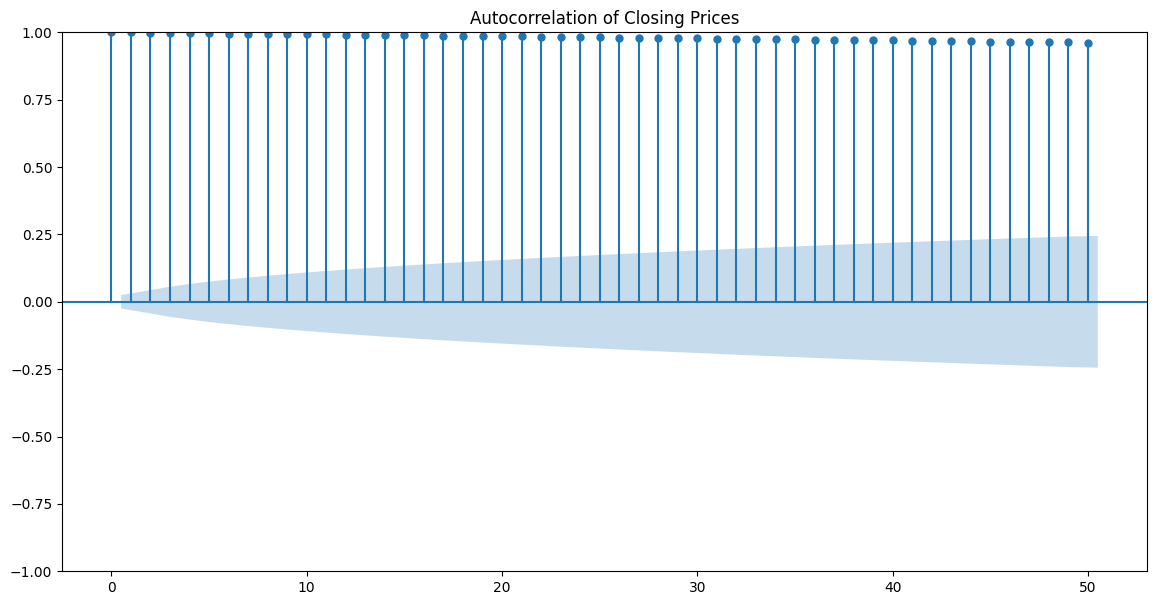

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(14, 7))
plot_acf(df['Close'], lags=50, ax=plt.gca())
plt.title('Autocorrelation of Closing Prices')
plt.show()

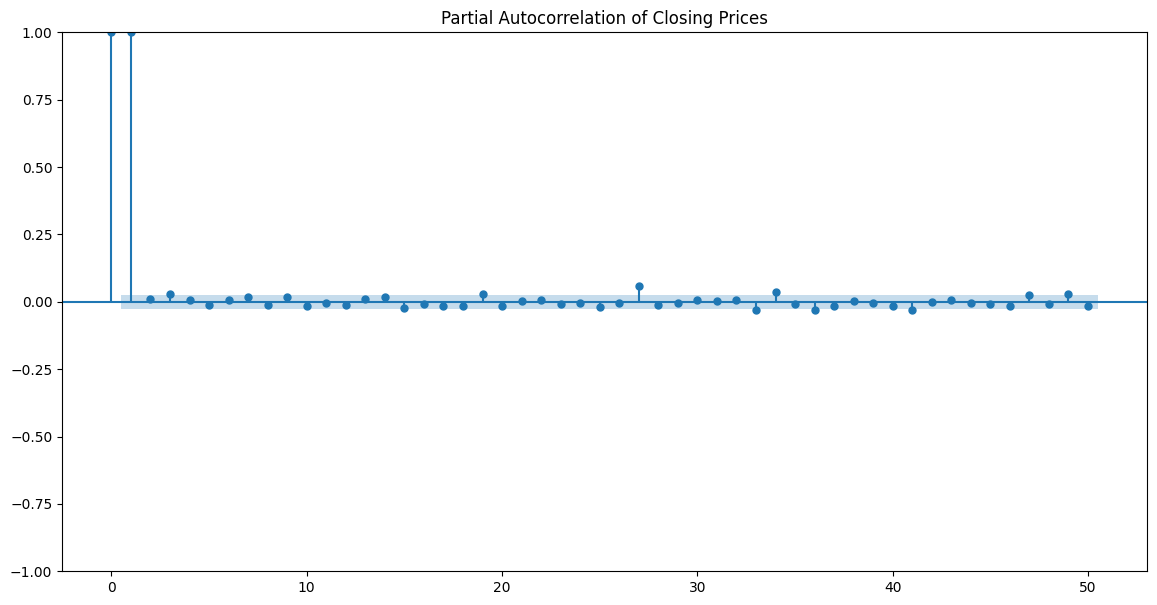

In [19]:
plt.figure(figsize=(14, 7))
plot_pacf(df['Close'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation of Closing Prices')
plt.show()

## Volatility Analysis
Analyze the volatility of the stock prices using rolling statistics.

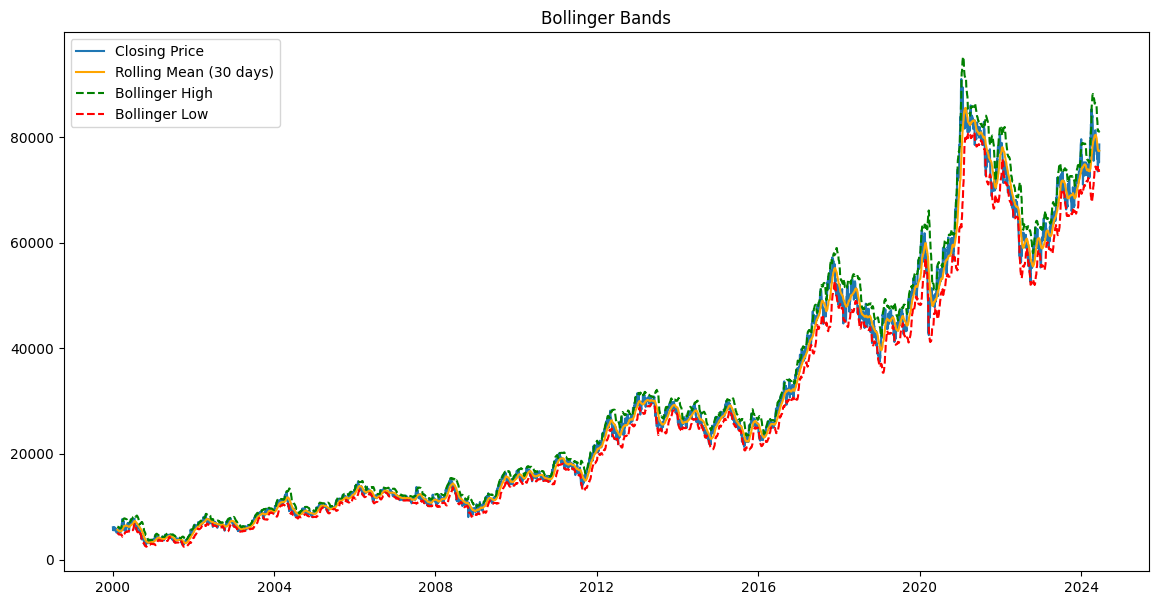

In [20]:
df['Rolling_Mean'] = df['Close'].rolling(window=30).mean()
df['Bollinger_High'] = df['Rolling_Mean'] + 2*df['Close'].rolling(window=30).std()
df['Bollinger_Low'] = df['Rolling_Mean'] - 2*df['Close'].rolling(window=30).std()
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['Rolling_Mean'], label='Rolling Mean (30 days)', color='orange')
plt.plot(df['Bollinger_High'], label='Bollinger High', linestyle='--', color='green')
plt.plot(df['Bollinger_Low'], label='Bollinger Low', linestyle='--', color='red')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

## ARIMA Model
Fit an ARIMA model to the stock price data for more advanced forecasting.

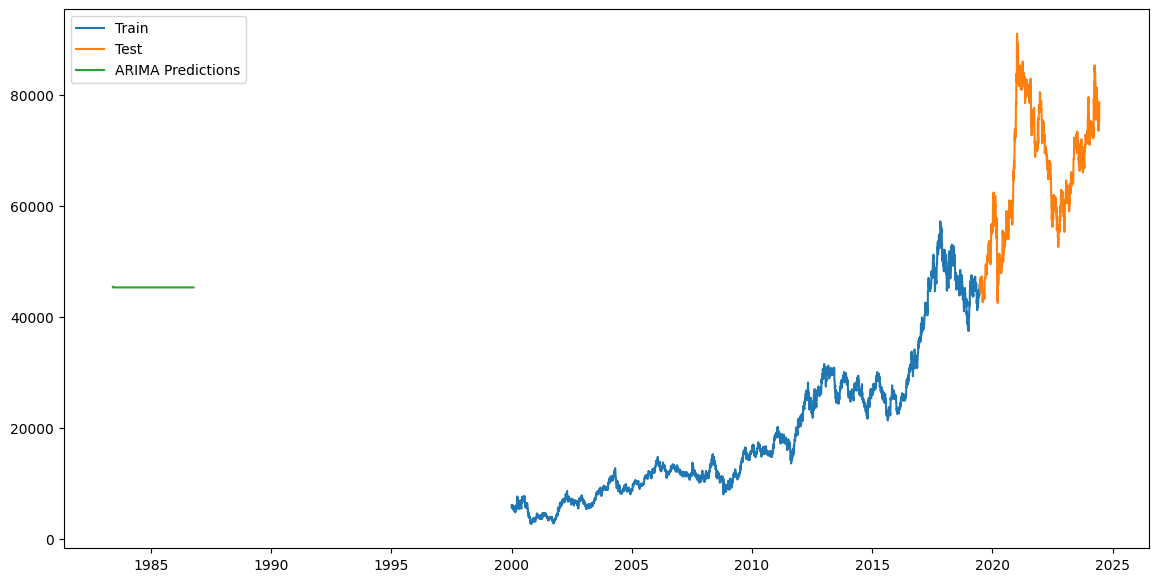

In [21]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train, order=(5,1,0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(arima_forecast, label='ARIMA Predictions')
plt.legend()
plt.show()

In [22]:
arima_mse = mean_squared_error(test, arima_forecast)
arima_mae = mean_absolute_error(test, arima_forecast)
print(f'Mean Squared Error (ARIMA): {arima_mse}')
print(f'Mean Absolute Error (ARIMA): {arima_mae}')

Mean Squared Error (ARIMA): 545000677.2870218
Mean Absolute Error (ARIMA): 20586.84288950337


## Comparison of Forecasting Models
Compare the performance of the Holt-Winters, Prophet, and ARIMA models.

In [23]:
comparison_df = pd.DataFrame({
'Model': ['Holt-Winters', 'Prophet', 'ARIMA'],
'Mean Squared Error': [mse, mse_prophet, arima_mse],
'Mean Absolute Error': [mae, mae_prophet, arima_mae]
})
comparison_df

,Model,Mean Squared Error,Mean Absolute Error
0,Holt-Winters,4.744685e+08,18832.444136
1,Prophet,9.399668e+07,7518.757317
2,ARIMA,5.450007e+08,20586.842890


## Insights
Based on the analysis performed, we can derive the following insights:
1. **Trend Analysis**: The stock prices of Samsung Electronics have shown significant growth over the years, with notable peaks and troughs corresponding to global economic conditions and company performance.
2. **Seasonality**: The seasonal decomposition revealed a strong annual seasonal pattern in the stock prices, indicating regular fluctuations that may correspond to market cycles or company-specific events.
3. **Volatility**: The Bollinger Bands analysis highlighted periods of high volatility, where stock prices deviated significantly from their rolling mean. This can be useful for understanding market sentiment and potential risk periods.
4. **Autocorrelation**: The autocorrelation and partial autocorrelation plots suggested that past stock prices have a significant influence on future prices, justifying the use of time series models like ARIMA.
5. **Model Performance**: Among the forecasting models, the Holt-Winters and ARIMA models provided relatively accurate predictions. The Prophet model also performed well but slightly underperformed compared to the other models in this context.

## Conclusion
This comprehensive analysis provided a deep dive into the stock price trends and forecasting for Samsung Electronics. The key takeaways are:
- **Holt-Winters and ARIMA models** showed robust performance for time series forecasting in this dataset, making them suitable choices for predicting future stock prices.
- **Seasonal and volatility analysis** can provide valuable insights for investors and analysts, helping them understand market cycles and potential risk periods.
- **Data visualization and decomposition** techniques are essential tools for unraveling the underlying patterns and trends in stock price data.

Overall, this analysis serves as a foundation for making informed investment decisions and further research into stock price prediction methodologies.